In [1]:
import numpy as np
import pandas as pd 


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv("C:/Users/Mahavir/Desktop/infy/train.csv",low_memory=False)

In [4]:
test=pd.read_csv("C:/Users/Mahavir/Desktop/infy/test.csv")

In [5]:
Master=pd.read_csv("C:/Users/Mahavir/Desktop/infy/master.csv")

In [81]:
test.shape

(530814, 15)

In [7]:
train.shape

(668264, 16)

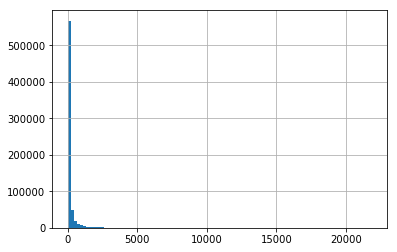

In [86]:
train.score.hist(bins=100)

In [12]:
train.describe()

,score,ups,downs,num_comments
count,668264.000000,568036.000000,601732.000000,635119.000000
mean,152.858743,362.409377,174.348992,38.023186
std,368.415208,3737.465889,2465.324358,499.410981
min,0.000000,0.000000,-1.000000,-5.000000
25%,17.000000,20.000000,2.000000,3.000000
50%,41.000000,48.000000,7.000000,10.000000
75%,119.000000,139.000000,20.000000,26.000000
max,21868.000000,114321.000000,74731.880000,358922.000000


In [87]:
#before imputation 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668264 entries, 0 to 668263
Data columns (total 16 columns):
score           668264 non-null int64
domain          668264 non-null object
id              668264 non-null object
title           668264 non-null object
author          610193 non-null object
ups             568036 non-null float64
downs           601732 non-null float64
num_comments    635119 non-null float64
permalink       668263 non-null object
over_18         668263 non-null object
subreddit_id    668262 non-null object
edited          668262 non-null object
is_self         668262 non-null object
name            668262 non-null object
url             668262 non-null object
created_date    668264 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 81.6+ MB


In [114]:
train.sort_values('created_date',ascending=False).tail(100)

,score,domain,id,title,author,ups,downs,num_comments,permalink,over_18,subreddit_id,edited,is_self,name,url,created_date
355346,1,ranprieur.com,68ydt,"Beyond """"""""""""""""Civilized"""""""""""""""" And """"""""""""""""P...",earthboundkid,5.0,4.0,1.0,http://www.reddit.com/r/longtext/comments/68yd...,False,t5_2qh8f,False,False,t3_68ydt,http://ranprieur.com/essays/beyondciv.html,2008-02-16 11:25:32
355353,2,cato-unbound.org,68xhu,Can an Omnipotent Government Make a Rock Bigge...,earthboundkid,4.0,2.0,1.0,http://www.reddit.com/r/longtext/comments/68xh...,False,t5_2qh8f,False,False,t3_68xhu,http://www.cato-unbound.org/2008/02/15/michael...,2008-02-16 03:04:45
72361,4,scienceblogs.com,68crl,Sequencing the campus at the Johns Hopkins Uni...,BioGeek,4.0,0.0,1.0,http://www.reddit.com/r/bioinformatics/comment...,False,t5_2qh0x,False,False,t3_68crl,http://scienceblogs.com/digitalbio/2006/07/seq...,2008-02-11 12:55:46
478339,732,smashingmagazine.com,68cpq,10 Principles Of Effective Web Design (with un...,NaN,926.0,194.0,72.0,http://www.reddit.com/r/programming/comments/6...,False,t5_2fwo,False,False,t3_68cpq,http://www.smashingmagazine.com/index.php/2008...,2008-02-11 12:32:44
142781,19,craigslist.org,68b9k,Best Of CraigsList: Looking For Link,redrobot5050,27.0,8.0,1.0,http://www.reddit.com/r/craigslist/comments/68...,False,t5_2qh5k,False,False,t3_68b9k,http://www.craigslist.org/about/best/den/49368...,2008-02-11 02:00:37
520723,5,youtube.com,68b4p,Anonymous - Minneapolis Scientology Protest - ...,CrimsonSun99,0.0,7.0,0.0,http://www.reddit.com/r/scientology/comments/6...,False,t5_2qh3a,False,False,t3_68b4p,http://www.youtube.com/watch?v=f22k7npkw0Q,2008-02-11 01:04:08
520724,4,flickr.com,68b4a,Minneapolis - Anonymous Scientology Protest (I...,CrimsonSun99,13.0,9.0,0.0,http://www.reddit.com/r/scientology/comments/6...,False,t5_2qh3a,False,False,t3_68b4a,http://www.flickr.com/search/?s=rec&amp;ss=1&a...,2008-02-11 01:00:01
428950,255,dailykos.com,689zc,Obama campaign gives journalism class free bac...,shii,344.0,89.0,14.0,http://www.reddit.com/r/obama/comments/689zc/o...,False,t5_1a8ah,False,False,t3_689zc,http://dailykos.com/storyonly/2008/2/10/0313/4...,2008-02-10 17:25:16
487423,0,youtube.com,6871i,7x7x7 Olympic Cube Solved by Frank Morris,amichail,0.0,0.0,0.0,http://www.reddit.com/r/puzzles/comments/6871i...,False,t5_2qh99,False,False,t3_6871i,http://youtube.com/watch?v=78aA1pAiIVU,2008-02-09 16:21:34
487313,3,thegameslist.com,6870g,Lots of neat (mostly Flash) puzzles,amichail,4.0,1.0,0.0,http://www.reddit.com/r/puzzles/comments/6870g...,False,t5_2qh99,False,False,t3_6870g,http://thegameslist.com/games/genre/Puzzle,2008-02-09 16:13:51


In [89]:
# Null values before data imputaions 
pd.isnull(train).sum()

score                0
domain               0
id                   0
title                0
author           58071
ups             100228
downs            66532
num_comments     33145
permalink            1
over_18              1
subreddit_id         2
edited               2
is_self              2
name                 2
url                  2
created_date         0
dtype: int64

In [132]:
#Null values in test data before imputation 
pd.isnull(test).sum()

domain              0
id                  0
title               0
author          18952
ups             79322
downs           53382
num_comments    26540
permalink           0
over_18             0
subreddit_id        0
edited              0
is_self             0
name                0
url                 0
created_date        0
dtype: int64

In [137]:
#Test after imputaion
pd.isnull(test).sum()

domain              0
id                  0
title               0
author          18952
ups                 0
downs               0
num_comments        0
permalink           0
over_18             0
subreddit_id        0
edited              0
is_self             0
name                0
url                 0
created_date        0
dtype: int64

In [6]:
train.loc[(pd.isnull(train.ups),'ups')]=0

In [7]:
test.loc[(pd.isnull(test.ups),'ups')]=0

In [8]:
train.loc[(pd.isnull(train.downs),'downs')]=0

In [9]:
test.loc[(pd.isnull(test.downs),'downs')]=0

In [10]:
train.loc[(pd.isnull(train.num_comments),'num_comments')]=0


In [11]:
test.loc[(pd.isnull(test.num_comments),'num_comments')]=0

In [12]:
#After imputation
pd.isnull(train).sum()

score               0
domain              0
id                  0
title               0
author          58071
ups                 0
downs               0
num_comments        0
permalink           1
over_18             1
subreddit_id        2
edited              2
is_self             2
name                2
url                 2
created_date        0
dtype: int64

In [13]:
np.count_nonzero(pd.unique(train.domain))

55011

In [14]:
np.count_nonzero(pd.unique(train.author))

142010

In [17]:
np.count_nonzero(pd.unique(train.subreddit_id))

2401

In [36]:
np.count_nonzero(pd.unique(train.name))

668263

In [42]:
np.count_nonzero(pd.unique(train.permalink))

668264

In [19]:
np.count_nonzero(pd.unique(Master.subscribers))

2315

In [22]:
np.count_nonzero(pd.unique(Master.name))

2500

In [21]:
Master.columns


Index(['uri', 'subscribers', 'name'], dtype='object')

In [116]:
np.corrcoef(train.score,train.ups)


array([[1.       , 0.4714167],
       [0.4714167, 1.       ]])

In [117]:
np.corrcoef(train.score,train.downs)

array([[1.        , 0.45562006],
       [0.45562006, 1.        ]])

In [125]:
np.corrcoef(train.score,train.ups-train.downs)


array([[1.        , 0.28438703],
       [0.28438703, 1.        ]])

In [129]:
np.corrcoef(train.score,train.ups+train.downs)

array([[1.        , 0.48452154],
       [0.48452154, 1.        ]])

In [75]:
X_train=train.filter(['id','url','title','score','created_date','subreddit_id'],axis=1)

In [47]:
#data_train=pd.merge(train,Master,left_on='url',right_index=True,how='left')
data_train=train[pd.isnull(train.url)==False].merge(Master,how='left', left_on='url', right_index=True)

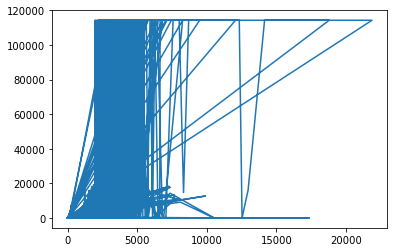

In [130]:
plt.plot(train.score,train.ups)

In [65]:
train.columns

Index(['score', 'domain', 'id', 'title', 'author', 'ups', 'downs',
       'num_comments', 'permalink', 'over_18', 'subreddit_id', 'edited',
       'is_self', 'name', 'url', 'created_date'],
      dtype='object')

In [37]:
X_test=test.drop(['id','author','created_date'],axis=1)

In [38]:
X_train=train.drop(['id','author','created_date'],axis=1)

In [39]:
X1_train=X_train.dropna()

In [40]:
pd.isnull(X1_train).sum()

score           0
domain          0
title           0
ups             0
downs           0
num_comments    0
permalink       0
over_18         0
subreddit_id    0
edited          0
is_self         0
name            0
url             0
dtype: int64

In [147]:
X1_train.shape

(668262, 12)

In [41]:
X1_train.head()

,score,domain,title,ups,downs,num_comments,permalink,over_18,subreddit_id,edited,is_self,name,url
0,324,youtube.com,"Notch posted a demonstration of the game - """"""...",0.0,28.0,209.0,http://www.reddit.com/r/0x10c/comments/10vto2/...,False,t5_2tu92,False,False,t3_10vto2,http://www.youtube.com/watch?v=49mUfXxDG48
1,298,youtube.com,New art test and dynamic lights for 0x10c,317.0,19.0,0.0,http://www.reddit.com/r/0x10c/comments/11d8ih/...,False,t5_2tu92,False,False,t3_11d8ih,http://www.youtube.com/watch?v=nYojT0Xgt9Y
2,295,i.imgur.com,Not being a programmer in 0x10c,333.0,38.0,34.0,http://www.reddit.com/r/0x10c/comments/usp9b/n...,False,t5_2tu92,False,False,t3_usp9b,http://i.imgur.com/SCaPS.gif
3,286,0x10c.com,At Minecon one of the Mojang guys told me that...,313.0,27.0,329.0,http://www.reddit.com/r/0x10c/comments/13uapp/...,False,t5_2tu92,False,False,t3_13uapp,http://0x10c.com/wp-content/uploads/2012/10/DC...
4,264,i.imgur.com,0x10c's artist posted a mockup for what the ga...,284.0,0.0,139.0,http://www.reddit.com/r/0x10c/comments/122hjs/...,False,t5_2tu92,False,False,t3_122hjs,http://i.imgur.com/akByX.jpg


In [28]:
Master.head(10)

,uri,subscribers,name
0,http://www.reddit.com/r/funny/,3997640,/r/funny: funny
1,http://www.reddit.com/r/announcements/,3931064,/r/announcements: Official Reddit announcements
2,http://www.reddit.com/r/pics/,3921652,/r/pics: /r/Pics
3,http://www.reddit.com/r/AskReddit/,3751470,/r/AskReddit: Ask Reddit...
4,http://www.reddit.com/r/blog/,3680629,/r/blog: The official reddit blog
5,http://www.reddit.com/r/todayilearned/,3614904,/r/todayilearned: Today I Learned (TIL)
6,http://www.reddit.com/r/worldnews/,3587949,/r/worldnews: World News
7,http://www.reddit.com/r/science/,3521953,/r/science: science
8,http://www.reddit.com/r/IAmA/,3475142,"/r/IAmA: I Am A, where the mundane becomes fas..."
9,http://www.reddit.com/r/WTF/,3407853,/r/WTF: WTF?!


In [35]:
train.loc[(train.url=='http://www.reddit.com/r/funny/'),]

,score,domain,id,title,author,ups,downs,num_comments,permalink,over_18,subreddit_id,edited,is_self,name,url,created_date
384940,0,reddit.com,10shi8,www.reddit.com/r/funny/,Kelsig,3.0,3.0,0.0,http://www.reddit.com/r/mildlyamusing/comments...,False,t5_2td7m,False,False,t3_10shi8,http://www.reddit.com/r/funny/,2012-10-02 00:36:46


In [33]:
(Master.uri=='http://i.imgur.com/').sum()

0

In [155]:
Master.shape

(2500, 3)

In [140]:
y_train=train.score

In [131]:
#regressor.fit(X_train, y_train)

In [43]:
X1_train.columns

Index(['score', 'domain', 'title', 'ups', 'downs', 'num_comments', 'permalink',
       'over_18', 'subreddit_id', 'edited', 'is_self', 'name', 'url'],
      dtype='object')

In [65]:
X2_train=X1_train.filter(['ups', 'downs', 'num_comments','over_18', 'is_self'])

In [66]:
X3_train=pd.get_dummies(columns=['over_18','is_self'],data=X2_train,drop_first='TRUE')

In [67]:
X3_train.head()

,ups,downs,num_comments,over_18_True,is_self_True
0,0.0,28.0,209.0,0,0
1,317.0,19.0,0.0,0,0
2,333.0,38.0,34.0,0,0
3,313.0,27.0,329.0,0,0
4,284.0,0.0,139.0,0,0


In [50]:
y_train=X1_train.score

In [45]:
X2_train.head()

,ups,downs,num_comments,over_18,edited,is_self
0,0.0,28.0,209.0,False,False,False
1,317.0,19.0,0.0,False,False,False
2,333.0,38.0,34.0,False,False,False
3,313.0,27.0,329.0,False,False,False
4,284.0,0.0,139.0,False,False,False


In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2_train,y_train, test_size = 0.2, random_state = 0)

In [51]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [69]:
regressor.fit(X_train1,y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [86]:
y_pred = regressor.predict(X_test1)

In [97]:
np.mean(np.absolute(y_test1.values-y_pred))

12.75980449045094

In [93]:
y_test1[1:10].values

array([ 13,  25,  28,  60,  46,   9,  54, 250, 175], dtype=int64)

In [94]:
y_pred[1:10]

array([ 13.        ,  25.        ,  28.        ,  60.        ,
        58.17066667,   8.47311914,  54.        , 250.04      ,
       174.77      ])

In [ ]:
# Now we will build the full model 


In [98]:
X2_test=X_test.filter(['ups', 'downs', 'num_comments','over_18', 'is_self'])

In [107]:
X3_test=pd.get_dummies(columns=['over_18','is_self'],data=X2_test,drop_first='TRUE')

In [113]:
test['score']= regressor.predict(X3_test)

In [ ]:
X3_test.shape

In [114]:
outfile=test.filter(['id','score'])

In [115]:
outfile.head()

,id,score
0,16zj9b,260.600000
1,16bb5r,151.609667
2,16bcyc,187.000000
3,16zq52,161.478238
4,16449c,78.577611


In [116]:
outfile.to_csv("C:/Users/Mahavir/Desktop/infy/outFile.csv",index=False)